## STAT 107 Final Project by Avani Puranik

# Hypothesis Test 1

In [1]:
import pandas as pd
flights = pd.read_csv('flights.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'flights.csv'

In [2]:
american = flights.loc[(flights['MONTH'] == 12) & (flights['ORIGIN_AIRPORT'] == 'ORD') & (flights['DESTINATION_AIRPORT'] == 'LAX') &
           (flights['AIRLINE'] == 'AA'), 'ARRIVAL_DELAY']
united = flights.loc[(flights['MONTH'] == 12) & (flights['ORIGIN_AIRPORT'] == 'ORD') & (flights['DESTINATION_AIRPORT'] == 'LAX') &
           (flights['AIRLINE'] == 'UA'), 'ARRIVAL_DELAY']
american = american.dropna()
united = united.dropna()

Hypothesis Test 1: Population 1 is American Airlines flights, Population 2 is United Airlines flights
Want to determine which airline on average has greater delay times and if this difference is statistically significant
Conditions: n1 = 280 >= 30, n2 = 302 >= 30
Hypotheses: Null Hypothesis: Mu1 - Mu2 = 0, Alternative Hypothesis: Mu1 - Mu2 != 0

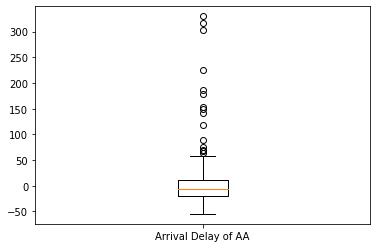

In [3]:
import matplotlib.pyplot as plt
plt.boxplot(american, labels = ['Arrival Delay of AA'])
plt.show()

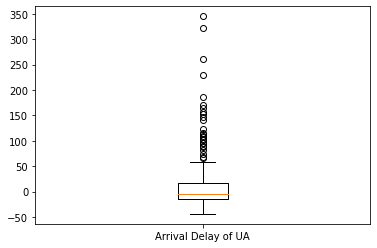

In [4]:
plt.boxplot(united, labels = ['Arrival Delay of UA'])
plt.show()

In [5]:
x_bar1 = american.mean()
sd1 = american.std()
x_bar2 = united.mean()
sd2 = united.std()

Compute the z test statistic

In [6]:
z_test = (x_bar1 - x_bar2)/((((sd1**2)/280) + ((sd2**2)/302))**0.5)
z_test

-1.3926811323141544

Compute the p-value

In [7]:
from scipy.stats import norm
p_value = 2 * norm.cdf(z_test)
p_value

0.16371623660393797

Conclusion: Since the p_value = 0.1637 > a = 0.05, we fail to reject H0. 
The data does not provide sufficient evidence to prove that there is a difference between the arrival delays of United Airlines and American Airlines, or our alternate hypothesis that states that mu1 - mu2 != 0. 

Hypothesis Test 1: For the first test, we were asked to compare the average arrival delays of United flights and American Airlines flights in the month of December from ORD to LAX. My approach to this hypothesis test was to see if there was a significant difference between these two population means that could be shown by the data provided. First, I checked if the conditions of two sample sizes greater than or equal to 30 were met, which was true because the sample sizes were n1 = 280 and n2 = 302. Since I wanted to find out whether there was a difference between the arrival delay of the two populations, I set up my alternate hypothesis to determine if the difference between the two population means was not 0, utilizing a two-sided hypothesis test. After determining the mean and standard deviation of both populations, I computed the z-statistic using the formula for two population mean tests. Using this value, I was able to apply CLT to use norm.cdf to determine the p-value. In my conclusion, I noticed that the p-value was not less than the alpha significance value, so I did not have evidence to reject the null hypothesis.

# Hypothesis Test 2

Hypothesis Test 2: Population 1 is American Airlines, Population 2 is United Airlines
Want to determine which airline has a larger proportion of delays greater than 60 minutes and if this difference 
is statistically significant

Conditions: n1 * p1_hat = 15 >= 10, n1 * (1 - p1_hat) = 265 >= 10, n2 * p2_hat = 26 >= 10, n2 * (1 - p2_hat) = 276 >= 10
Hypotheses: Null hypothesis: p1 = p2, Alternate hypothesis: p1 != p2

In [8]:
success_1 = []
success_2 = []
for i in american:
    if (i > 60):
        success_1.append(i)
for i in united:
    if (i > 60):
        success_2.append(i)

In [9]:
p1_hat = 15/280
p2_hat = 26/302
p_hat = (15+26)/582

Compute the z test statistic

In [10]:
z_stat = (p1_hat - p2_hat)/(((p_hat * (1 - p_hat)) * ((1/280) + (1/302)))**0.5)
z_stat

-1.5318672735156422

Compute the p-value

In [11]:
from scipy.stats import norm
p_value = 2 * norm.cdf(z_stat)
p_value

0.12555519084273978

Conclusion: Since the p_value = 0.12556 > a = 0.05, we fail to reject the null hypothesis.
The data does not provide sufficient evidence to suggest that there is a difference between the proportion of United and American Airlines flights that have an arrival delay greater than one hour, or our alternate hypothesis of 
p1 != p2. 

Hypothesis Test 2: For the second test, we were asked to compare the proportion of arrival delays greater than 60 minutes among United and American Airlines flights in the month of December from ORD to LAX. My approach to this hypothesis test was to determine if there was a significant difference between the proportion of flights in these populations that had an arrival delay greater than 60 minutes. First, I checked if the conditions to do this test were met by determining if the sample size times the proportion and (1 - proportion) for both populations were greater than 10, which I determined to be true. I set up my alternate hypothesis to determine if there was a difference between the two population proportions, utilizing a two-sided hypothesis test. After determining the proportion of the samples that exceeded an arrival delay of 60 minutes, I computed p_hat using those two values and determined the z-test statistic. Using this value, I was able to apply CLT to use norm.cdf to determine the p-value. In my conclusion, I stated that the p-value was not less than the alpha significance value, so the data did not provide evidence to reject the null hypothesis.

# Hypothesis Test 3

Hypothesis Test 3: is there a greater average travel delay in Delta Airlines flights from ORD to ATL in the month of December versus the month of February?
Population 1 will be the Delta Airlines flights from ORD to ATL in February
Population 2 will be the Delta Airlines flights from ORD to ATL in December

In [12]:
february = flights.loc[(flights['MONTH'] == 2) & (flights['ORIGIN_AIRPORT'] == 'ORD') & (flights['DESTINATION_AIRPORT'] == 'ATL') &
           (flights['AIRLINE'] == 'DL'), 'ARRIVAL_DELAY']
december = flights.loc[(flights['MONTH'] == 12) & (flights['ORIGIN_AIRPORT'] == 'ORD') & (flights['DESTINATION_AIRPORT'] == 'ATL') &
           (flights['AIRLINE'] == 'DL'), 'ARRIVAL_DELAY']
february = february.dropna()
december = december.dropna()

We will determine if the difference in the average arrival delay in Delta Airlines flights will be different in the months of December and February.

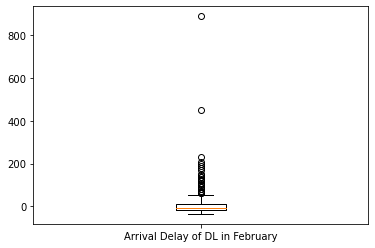

In [13]:
import matplotlib.pyplot as plt
plt.boxplot(february, labels = ['Arrival Delay of DL in February'])
plt.show()

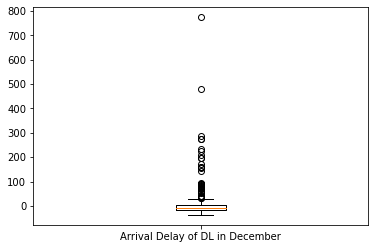

In [14]:
plt.boxplot(december, labels = ['Arrival Delay of DL in December'])
plt.show()

Conditions: n1 = 289 >= 30, n2 = 308 >= 30, two-population mean hypothesis test can be applied
Hypotheses: Null hypothesis: mu1 = mu2, Alternate hypothesis: mu1 < mu2

In [15]:
x_bar1 = february.mean()
sd1 = february.std()
x_bar2 = december.mean()
sd2 = december.std()

Compute the test statistic

In [16]:
z_test = (x_bar1 - x_bar2)/((((sd1**2)/289) + ((sd2**2)/308))**0.5)
z_test

0.05069184640648453

Compute the p-value

In [17]:
from scipy.stats import norm
p_value = norm.cdf(z_test)
p_value

0.5202144630386951

Conclusion: Since our p_value = 0.5202 > a = 0.05, we fail to reject the null hypothesis.
The data does not provide sufficient evidence to suppport our alternate hypothesis or the statement that the average arrival delay of Delta Airlines flights from ORD to ATL are greater in the month of December in comparison to the month of February.

Hypothesis Test 3: For the third hypothesis test, I decided to focus on the question of whether the average arrival delay for Delta Airlines flights from ORD to ATL in December was greater than that of the month of February due to the increased travel during the month of December. Since I wanted to determine if the population of December flights had a greater average arrival delay, I set up my alternate hypothesis to say that the population mean of flights in December was greater than the population mean of flights in February. First, I checked if the conditions to apply this test were both sample sizes being greater than or equal to 30, which I determined to be true with n1 = 289 and n2 = 308. After calculating the sample means and standard deviations of both samples, I was able to plug these values in to determine the z-statistic value. Finally, I applied CLT to use norm.cdf to determine the p-value. In my conclusion, I determined that the data did not provide sufficient evidence to reject the null hypothesis and claim that average arrival delays were greater in December compared to February.

# Hypothesis Test 4

Hypothesis test 4:
Conduct three tests above using Bonferroni correction with family-wise error rate a = 0.05.
Since the formula for the corrected p-value is a/n and a = 0.05 and three tests have been conducted, a/n = 0.0167.

Test 1: Since the p_value = 0.1637 > a = 0.0167, we fail to reject the null hypothesis. 
The data does not provide sufficient evidence to prove that there is a difference between the arrival delays of United Airlines and American Airlines, or our alternate hypothesis that states that mu1 - mu2 != 0.

Test 2: Since the p_value = 0.12556 > a = 0.0167, we fail to reject the null hypothesis.
The data does not provide sufficient evidence to suggest that there is a difference between the proportion of United and American Airlines flights that have an arrival delay greater than one hour, or our alternate hypothesis of 
p1 != p2. 

Test 3: Since our p_value = 0.5202 > a = 0.0167, we fail to reject the null hypothesis.
The data does not provide sufficient evidence to suppport our alternate hypothesis mu1 < mu2 or the statement that the average arrival delay of Delta Airlines flights from ORD to ATL are greater in the month of December in comparison to the month of February.

Hypothesis Test 4: For the final hypothesis test, I used the Bonferroni correction to conduct the three tests above with a family-wise error rate of a = 0.05. Using this value of a and n of 3 due to three tests being conducted, I determined that the new alpha using the formula a/n was a = 0.0167. Using this new value of a, I restated my conclusions based on the p-values calculated while performing the tests. All three conclusions remained the same as a result of this new alpha value.